In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
noise_factor = 0.1

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [ ]:
noise_dataset = np.array(noise_dataset)

In [ ]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 32, 32, 3)

In [ ]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 3)         435       
Total params: 3,795
Trainable params: 3,795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 32, 32, 3),          
                X_train.reshape(-1, 32, 32, 3), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 32, 32, 3), X_test.reshape(-1, 32, 32, 3)))

Epoch 1/10
250/250 [==============================] - 23s 88ms/step - loss: 0.6395 - val_loss: 0.5767
Epoch 2/10
250/250 [==============================] - 22s 86ms/step - loss: 0.5738 - val_loss: 0.5690
Epoch 3/10
250/250 [==============================] - 21s 86ms/step - loss: 0.5670 - val_loss: 0.5658
Epoch 4/10
250/250 [==============================] - 22s 86ms/step - loss: 0.5647 - val_loss: 0.5646
Epoch 5/10
250/250 [==============================] - 22s 87ms/step - loss: 0.5632 - val_loss: 0.5637
Epoch 6/10
250/250 [==============================] - 22s 86ms/step - loss: 0.5624 - val_loss: 0.5632
Epoch 7/10
250/250 [==============================] - 22s 86ms/step - loss: 0.5623 - val_loss: 0.5629
Epoch 8/10
250/250 [==============================] - 22s 87ms/step - loss: 0.5623 - val_loss: 0.5625
Epoch 9/10
250/250 [==============================] - 22s 87ms/step - loss: 0.5618 - val_loss: 0.5618
Epoch 10/10
250/250 [==============================] - 22s 88ms/step - loss: 0.561

In [ ]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 32, 32, 3), X_test.reshape(-1, 32, 32, 3))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 3s 9ms/step - loss: 0.5611
Test Accuracy : 0.561


In [ ]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 32, 32, 3))

In [ ]:
predicted.shape

(10, 32, 32, 3)

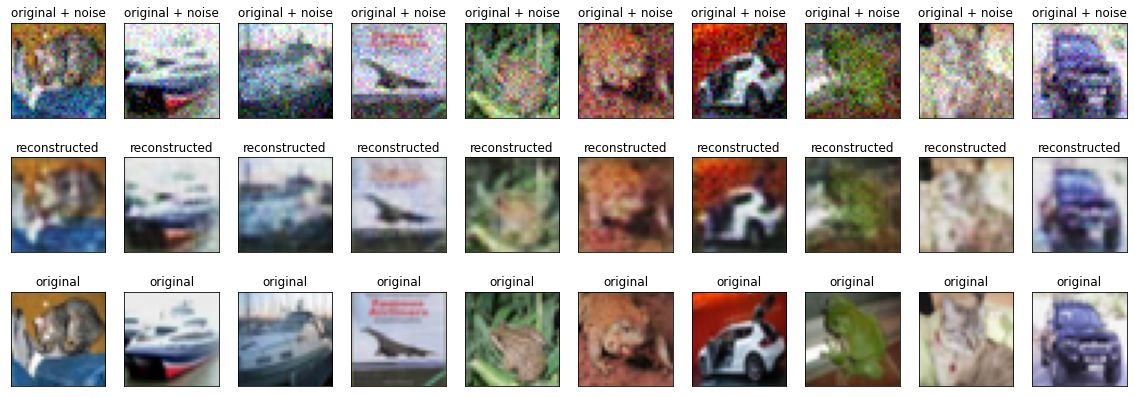

In [ ]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  ax = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(noise_test_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  bx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(predicted[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  cx = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(X_test[i])) 
  cx.get_xaxis().set_visible(False) 
  cx.get_yaxis().set_visible(False) 

plt.show()